In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [67]:
m_df=pd.read_csv('movie_metadata.csv')

In [68]:
m_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [69]:
m_df.shape

(5043, 28)

In [70]:
m_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [71]:
m_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [72]:
m_df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [73]:
m_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [74]:
#dropping the imdb link from dataset
m_df.drop('movie_imdb_link', axis=1, inplace=True)

In [75]:
m_df["color"].value_counts()

Color               4529
 Black and White     200
Name: color, dtype: int64

In [76]:
#removing the 'color' section as most of the movies is colored
m_df.drop('color',axis=1,inplace=True)

In [77]:
m_df.shape

(4737, 26)

In [78]:
m_df["content_rating"].fillna("R", inplace = True)

In [79]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed
m_df["aspect_ratio"].fillna(m_df["aspect_ratio"].median(),inplace=True)

In [80]:
#We need to replace the value in budget with the median of the value
m_df["budget"].fillna(m_df["budget"].median(),inplace=True)

In [81]:
# We need to replace the value in gross with the median of the value
m_df['gross'].fillna(m_df['gross'].median(),inplace=True)

In [82]:
# Recheck that all the null values are removed
m_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [83]:
#Removing the duplicate values in the datset
m_df.drop_duplicates(inplace=True)

In [84]:
m_df.shape

(4695, 26)

In [85]:
m_df["language"].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Korean           8
Portuguese       8
Danish           5
Persian          4
Dutch            4
Norwegian        4
Swedish          4
Hebrew           4
Arabic           3
Thai             3
Indonesian       2
Dari             2
Zulu             2
Aboriginal       2
None             2
Vietnamese       1
Icelandic        1
Bosnian          1
Mongolian        1
Maya             1
Kazakh           1
Telugu           1
Polish           1
Romanian         1
Greek            1
Hungarian        1
Filipino         1
Aramaic          1
Dzongkha         1
Czech            1
Name: language, dtype: int64

In [86]:
#Most of the values for the languages is english we can drop the english column
m_df.drop('language',axis=1,inplace=True)

In [87]:
#Creating a new column to check the net profit made by the company (Gross-Budget) 
m_df["Profit"]=m_df['gross'].sub(m_df['budget'], axis = 0) 

In [88]:
#Creating a new column to check the profit percentage made by the company 
m_df['Profit_Percentage']=(m_df["Profit"]/m_df["gross"])*100
m_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,63071.0,90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,-4416.0,-96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,...,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84,6005908.0,23.094398


In [89]:
#Value counts for the countries 
value_counts=m_df["country"].value_counts()
value_counts

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Denmark             11
Mexico              11
Brazil               8
South Africa         8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Czech Republic       3
Belgium              3
Switzerland          3
West Germany         3
Israel               3
Poland               2
Iceland              2
Hungary              2
Taiwan               2
Greece               2
Romania              2
Turkey               1
Aruba                1
Finland              1
Bulgaria             1
New Line             1
Official site        1
Bahamas    

In [90]:
##get top 2 values of index
vals = value_counts[:2].index
vals

Index(['USA', 'UK'], dtype='object')

In [91]:
#dividing the country into three catogories 
m_df['country'] = m_df.country.where(m_df.country.isin(vals), 'other')

In [92]:
m_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,...,other,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,63071.0,90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,-4416.0,-96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,...,other,R,20000000.0,2013.0,470.0,7.7,2.35,84,6005908.0,23.094398


In [93]:
#Successfully divided the country into three catogories
m_df["country"].value_counts()

USA      3568
other     707
UK        420
Name: country, dtype: int64

In [94]:
#Removing the director name column
m_df.drop('director_name', axis=1, inplace=True)

In [95]:
#Removing the actor1 ,actor 2 and actor 3 names
m_df.drop('actor_1_name',axis=1,inplace=True)

In [96]:
m_df.drop('actor_2_name',axis=1,inplace=True)
m_df.drop('actor_3_name',axis=1,inplace=True)
m_df.drop('movie_title',axis=1,inplace=True)
m_df.drop('plot_keywords',axis=1,inplace=True)

In [97]:
#Value count of genres
m_df['genres'].value_counts()

Drama                                         209
Comedy                                        186
Comedy|Drama|Romance                          182
Comedy|Drama                                  180
Comedy|Romance                                149
                                             ... 
Documentary|Drama|War                           1
Drama|Mystery|War                               1
Drama|Fantasy|Music|Romance                     1
Fantasy|Mystery|Thriller                        1
Adventure|Animation|Comedy|Fantasy|Romance      1
Name: genres, Length: 875, dtype: int64

In [98]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column
m_df.drop('genres',axis=1,inplace =True)

In [99]:
# Dropiing the profit column from the dataset
m_df.drop('Profit',axis=1,inplace=True)

In [100]:
#Dropping the profit percentage column from the dataset
m_df.drop('Profit_Percentage',axis=1,inplace=True)

In [101]:
#Adding the facebook likes of actor 2 and actor 3 together 
m_df['Other_actor_facebbok_likes']=m_df["actor_2_facebook_likes"] + m_df['actor_3_facebook_likes']

In [102]:
m_df.drop('actor_2_facebook_likes',axis=1,inplace=True)
m_df.drop('actor_3_facebook_likes',axis=1,inplace=True)
m_df.drop('cast_total_facebook_likes',axis=1,inplace=True)

In [103]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

m_df['critic_review_ratio']=m_df['num_critic_for_reviews']/m_df['num_user_for_reviews']

In [104]:
#Dropping the num_critic_for_review

m_df.drop('num_critic_for_reviews',axis=1,inplace=True)
m_df.drop('num_user_for_reviews',axis=1,inplace=True)

In [107]:
m_df = pd.get_dummies(data = m_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
m_df = pd.get_dummies(data = m_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

KeyError: "None of [Index(['country'], dtype='object')] are in the [columns]"

In [108]:
m_df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'Other_actor_facebbok_likes', 'critic_review_ratio', 'country_USA',
       'country_other', 'content_rating_G', 'content_rating_GP',
       'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed',
       'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G',
       'content_rating_TV-PG', 'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [114]:
m_df.isna().sum()

duration                      0
director_facebook_likes       0
actor_1_facebook_likes        0
gross                         0
num_voted_users               0
facenumber_in_poster          0
budget                        0
title_year                    0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
Other_actor_facebbok_likes    0
critic_review_ratio           0
country_USA                   0
country_other                 0
content_rating_G              0
content_rating_GP             0
content_rating_M              0
content_rating_NC-17          0
content_rating_Not Rated      0
content_rating_PG             0
content_rating_PG-13          0
content_rating_Passed         0
content_rating_R              0
content_rating_TV-14          0
content_rating_TV-G           0
content_rating_TV-PG          0
content_rating_Unrated        0
content_rating_X              0
dtype: int64

In [116]:
m_df['imdb_score']

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5034    6.3
5035    6.9
5037    6.4
5038    7.7
5042    6.6
Name: imdb_score, Length: 4695, dtype: float64

In [131]:
#X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes','Other_actor_facebbok_likes','critic_review_ratio','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=m_df)
#y=pd.DataFrame(columns=['imdb_score'],data=m_df)
X=m_df.drop(['imdb_score'],axis=1)
y=m_df['imdb_score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [111]:
X_test,y_test

(      duration  director_facebook_likes  actor_1_facebook_likes        gross  \
 4480      92.0                     83.0                   469.0   26005908.0   
 2732     100.0                      5.0                   192.0   26005908.0   
 974      125.0                      0.0                 10000.0   48154732.0   
 350      124.0                    212.0                  1000.0   11000000.0   
 1267     136.0                   3000.0                 14000.0   42615685.0   
 ...        ...                      ...                     ...          ...   
 1012     100.0                     65.0                  1000.0   19118247.0   
 1598     111.0                      0.0                 11000.0  108244774.0   
 3890     152.0                    309.0                   232.0   36000000.0   
 2020     114.0                     19.0                  1000.0   28772222.0   
 4816      88.0                     30.0                    15.0    1523883.0   
 
       num_voted_users  fa

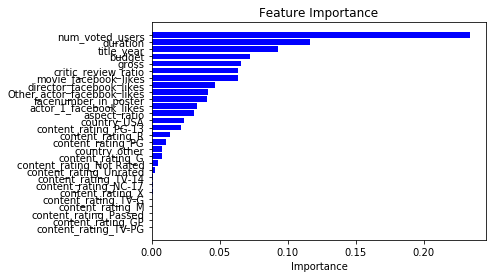

In [63]:
#feature importance
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
features=x.columns
importance = forest.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)),importance[indices],color='b',align ='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

array([1.16501853e-01, 4.66553479e-02, 3.36974003e-02, 6.56985794e-02,
       2.34416445e-01, 4.07819490e-02, 7.19968333e-02, 9.31806831e-02,
       3.10609639e-02, 6.36695901e-02, 4.16609678e-02, 6.38024811e-02,
       2.35965665e-02, 8.02763285e-03, 7.78193965e-03, 7.17436626e-05,
       1.20374862e-04, 1.04844101e-03, 4.70411478e-03, 1.07815092e-02,
       2.18307323e-02, 7.43236991e-05, 1.35632428e-02, 1.23809944e-03,
       5.75390473e-04, 5.74197516e-05, 2.55569790e-03, 8.49677047e-04])

In [127]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
x_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(X_test)

In [128]:
x_train

array([[3.44936709e-01, 2.45909091e-02, 4.61538462e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.16455696e-01, 0.00000000e+00, 3.32692308e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06962025e-01, 7.72727273e-04, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.34177215e-01, 3.18181818e-04, 7.69230769e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48101266e-01, 1.81818182e-01, 8.07692308e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06962025e-01, 3.68181818e-03, 1.15384615e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [121]:
def RF():
    global x_train,x_test,y_train,y_test
    
    clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
    clf = clf.fit(x_train, y_train)
    
    predictions = clf.predict(x_test)
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@RF.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
RF()

MAE=  0.5645706174591909
MSE=  0.5718415613910576
RMS=  0.7562020638632624

r_square: 0.5080177054936864

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9                 6.920
1            7.1                 5.504
2            6.8                 6.174
3            8.5                 6.048
5            6.6                 6.650
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [123]:
def svr():
    global x_train,x_test,y_train,y_test
    svr = SVR(kernel='rbf')
    svr = svr.fit(x_train, y_train)
    
    predictions = svr.predict(x_test)
    
    
    df_output = pd.DataFrame()
    df_output['imdb_score'] = x['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@svr.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
svr()

MAE=  0.6709105337977055
MSE=  0.8278489836400479
RMS=  0.9098620684697477

r_square: 0.28776243285782355

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9              7.091394
1            7.1              6.432759
2            6.8              6.677064
3            8.5              6.285524
5            6.6              6.887305
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [124]:
def KNN():
    knn = KNeighborsRegressor()
    knn = knn.fit(x_train, y_train)
    
    predictions = knn.predict(x_test)
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
KNN()

MAE=  0.698736692689851
MSE=  0.8415806955287438
RMS=  0.9173770737972166

r_square: 0.2759483927833907

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9                  7.48
1            7.1                  5.54
2            6.8                  6.64
3            8.5                  6.54
5            6.6                  6.74
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [125]:
def LR():
    lr = LinearRegression()
    lr = lr.fit(x_train, y_train)
    
    predictions = lr.predict(x_test)
    df_output = pd.DataFrame()
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
LR()

MAE=  0.6730357407306093
MSE=  0.7967052665789284
RMS=  0.8925834787732341

r_square: 0.314556843082069

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9              7.146369
1            7.1              6.126544
2            6.8              6.563556
3            8.5              6.139367
5            6.6              6.924195
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [137]:
def LR():
    lm=LinearRegression()
    
    lm.fit(x_train,y_train)
    predictions=lm.predict(x_test)
    res = pd.DataFrame(predictions)
    res.index = X_test.index # its important for comparison
    res['predictions'] = predictions

    res.to_csv("prediction_results.csv")
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    r_square = metrics.r2_score(y_test,predictions)
    print('\nr_square:', r_square)
LR()

MAE=  0.6730357407306093
MSE=  0.7967052665789284
RMS=  0.8925834787732341

r_square: 0.314556843082069


In [152]:
def RF():
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    global new_x_train,new_x_test,new_data
    clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
    clf = clf.fit(x_train, y_train)
    features = pd.DataFrame()
    features['Feature'] = x.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    selector = SelectFromModel(clf, prefit=True)
    train_reduced = selector.transform(x_train)
    new_x_train=pd.DataFrame(train_reduced,columns=['num_voted_users','duration' ,'title_year', 'budget','gross','critic_review_ratio','movie_facebook_likes','director_facebook_likes','Other_actor_facebbok_likes','facenumber_in_poster'])
    test_reduced = selector.transform(x_test)
    new_x_test=pd.DataFrame(test_reduced,columns=['num_voted_users','duration' ,'title_year', 'budget','gross','critic_review_ratio','movie_facebook_likes','director_facebook_likes','Other_actor_facebbok_likes','facenumber_in_poster'])
    new_reduced=selector.transform(x_test)
    new_data=pd.DataFrame(new_reduced,columns=['num_voted_users','duration' ,'title_year', 'budget','gross','critic_review_ratio','movie_facebook_likes','director_facebook_likes','Other_actor_facebbok_likes','facenumber_in_poster'])
    parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 5,
              'max_features': 'sqrt',
              'max_depth': 6}

    rf = RandomForestRegressor(**parameters)
    rf.fit(new_x_train, y_train)
    pred=rf.predict(new_x_test)
    
    
    return features[:5],new_x_train
    
    print("\nPredicted values on the New Data:\n\n",df_output)

In [153]:
RF()

(                      Importance
 Feature                         
 num_voted_users         0.173691
 duration                0.128596
 movie_facebook_likes    0.086319
 title_year              0.085609
 critic_review_ratio     0.081897,
       num_voted_users  duration  title_year    budget     gross  \
 0            0.344937  0.024591    0.046154  0.055634  0.071216   
 1            0.316456  0.000000    0.003327  0.000686  0.012611   
 2            0.306962  0.000773    0.050000  0.050508  0.036990   
 3            0.259494  0.000136    0.007692  0.000000  0.003557   
 4            0.335443  0.004136    0.015385  0.206163  0.066516   
 ...               ...       ...         ...       ...       ...   
 3281         0.313291  0.000682    0.002488  0.039875  0.004265   
 3282         0.250000  0.000773    0.050000  0.027168  0.110382   
 3283         0.234177  0.000318    0.007692  0.184947  0.117006   
 3284         0.348101  0.181818    0.080769  0.478485  0.355788   
 3285        